**Assignment 5.2: Build and Apply Multilayer Perceptron**

Name: Ignacio, Edrie<br>
Course and Section: CPE019 - CPE32S1<br>
Date of Submission: 06/23/2024<br>
Instructor: Engr. Roman M. Richard<br>


# **Dataset**

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

**PROBLEM**

Since Cancer is still among the deadly diseases up to this generation, it is pertinent to use the technology available in this present time. The case that I would like to address now is Breast Cancer, more particularly to use this data set whether the breast cancer is benign or malignant? These data of this dataset are obtained from a digitized image of a fine needle aspirate or FNA of breast mass.

**Desired Solution**

With an aim to achieve the objective of confirming whether this dataset and the code used attains 95% or equivalent accuracy using Multilayer perceptron model. If this accuracy parameter is provided on succession, this dataset I regarded to be qualified to undergo for qualified research in order to assist the world to know the type of breast cancer even only through Fine Needle Aspirate (FNA).

# **Model Creation**

**Libraries used and seed setting**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

seed = 7
np.random.seed(seed)

**Loading the dataset**

In [ ]:
dataset = pd.read_csv("breastcancer-fna.csv", delimiter=",")
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Verify if there are empty values**

In [ ]:
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Verify if there are other datatypes besides int or if there are NaN**

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Since there are NaN values, we need to give them values**

In [ ]:
import pandas as pd

data = pd.read_csv('breastcancer-fna.csv')

data.fillna(data.mean(), inplace=True)

<ipython-input-6-41ddb9df48ee>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


**Since there is string data type values, we also need to convert them into int or numerical values**

In [ ]:
dataset["diagnosis"] = dataset["diagnosis"].apply(lambda toLabel: 0 if toLabel == 'negative' else 1)

**To verify if there all attributes are now of numerical values**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Splitting the Values into X and Y for Training and Testing**

In [ ]:
X = dataset.iloc[:, :8]  # Features
Y = dataset.iloc[:, 8]   # Target variable

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

NameError: name 'train_test_split' is not defined

**Creating the Model**

In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=64, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch 1/500
8/8 [==============================] - 0s 24ms/step - loss: 0.3034 - accuracy: 0.0242 - val_loss: 0.2843 - val_accuracy: 0.0175
Epoch 2/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3034 - accuracy: 0.0242 - val_loss: 0.2843 - val_accuracy: 0.0175
Epoch 3/500
8/8 [==============================] - 0s 14ms/step - loss: 0.3034 - accuracy: 0.0242 - val_loss: 0.2842 - val_accuracy: 0.0175
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 0.3035 - accuracy: 0.0242 - val_loss: 0.2842 - val_accuracy: 0.0175
Epoch 5/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3035 - accuracy: 0.0242 - val_loss: 0.2842 - val_accuracy: 0.0175
Epoch 6/500
8/8 [==============================] - 0s 14ms/step - loss: 0.3035 - accuracy: 0.0242 - val_loss: 0.2842 - val_accuracy: 0.0175
Epoch 7/500
8/8 [==============================] - 0s 13ms/step - loss: 0.3035 - accuracy: 0.0242 - val_loss: 0.2842 - val_accuracy: 0.0175
Epoch 8/500
8/8 [===

In [ ]:
# Create model
model = Sequential()
model.add(Dense(512, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(256, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(128, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=150, batch_size=20)

Epoch 1/150
23/23 [==============================] - 2s 17ms/step - loss: 13713.8086 - accuracy: 0.0198 - val_loss: 6631.4951 - val_accuracy: 0.0175
Epoch 2/150
23/23 [==============================] - 0s 7ms/step - loss: 13855.7422 - accuracy: 0.0242 - val_loss: 48.8817 - val_accuracy: 0.0000e+00
Epoch 3/150
23/23 [==============================] - 0s 8ms/step - loss: 1352.3275 - accuracy: 0.0220 - val_loss: 2151.7058 - val_accuracy: 0.0175
Epoch 4/150
23/23 [==============================] - 0s 7ms/step - loss: 10927.1670 - accuracy: 0.0198 - val_loss: 5475.2720 - val_accuracy: 0.0175
Epoch 5/150
23/23 [==============================] - 0s 8ms/step - loss: 9543.7832 - accuracy: 0.0176 - val_loss: 7935.8145 - val_accuracy: 0.0175
Epoch 6/150
23/23 [==============================] - 0s 8ms/step - loss: 6570.6611 - accuracy: 0.0220 - val_loss: 4296.5020 - val_accuracy: 0.0175
Epoch 7/150
23/23 [==============================] - 0s 8ms/step - loss: 3748.8259 - accuracy: 0.0220 - val_loss

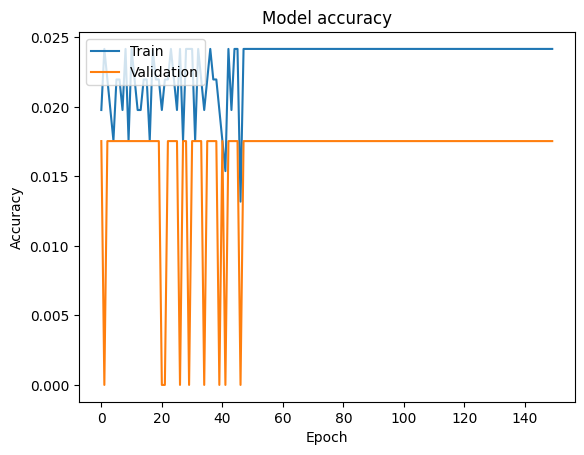

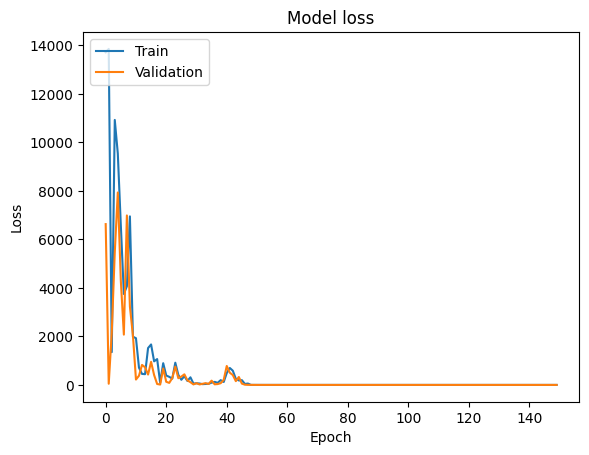

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Call the function to plot the training history
plot_history(history)

# Evaluation

Looking at the findings of the result above, the realization is that this dataset from kaggle is not workable for the use of researchers because despite an experimental check on the efficacy of its attributes in the model above, it has a very low accuracy of only 1. 75% in the Test Accuracy: and 2.4% average accuracy in the actual model testing.

# Summary, Conclusion, and Lessons Learned

**Summary**

For this activity where we are required to training and use perceptron model, I select a data set which contains breast cancer information on whether is can be classified as benign or malignant. In the simplest of terms, bening is the kind of breast cancer where it is polished and highly defined. On the other hand, the malignant types of this type of cancer is not well known of their pattern and this is the most difficult experience when having this kind of sickness. Subsequent to model creation, and while the dataset is split into training and testing parameters, it passes through a model. This is seen after the testing whereby it has low accuracy meaning that it cannot be used for research and general use of the dataset.

**Conclusion**

In conclusion, this activity assisted me in learning more about python, not only within the topic of perceptron where I focused on multilayer perceptron. Unfortunately, the dataset is ineligible because its accuracy is very low. Nonetheless, I have achieved what my objectives are – that is, to assess this dataset for breast cancer if it is suitable or not for the research endeavor.


**Lessons Learned**

Some of the things that I realized during this activity is that I should be more serious in my academics, particularly in coding. For my part, personally, I still do not possess or have the capabilities to code on my own. Sadly, since the inception of the course Emtech, I have been struggling with all its submissions. In this however I got to learn a lot more things not only in coding but also in life. Among the things I have learned is to learn something secretly because there are times when it would pay off to know it at the back of your head.